# Itzkovitz Population Mixture Model

#### http://shalevlab.weizmann.ac.il/wp-content/uploads/2016/02/telomeres.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.optimize import curve_fit
import math
from scipy.integrate import odeint
import pandas as pd
import os

## Average telomere length


In [13]:
# we setup the equation
def average_tel(t, params):
    LO, M, delta, alpha= params
    y = LO - ((2*M*delta)/alpha)*(1-math.e**(-alpha*t))
    return y

In [14]:
#parameters and set up
t = np.linspace (18, 100, 1000)

#parameters [initial length, division rate, fraction of attrition, death - division)
#LO is just from the GS, everything else has no scientific basis rn haha

LO = 8
M = 1000
delta = 0.00001
alpha = 0.01

params = np.array([LO, M, delta, alpha])

In [15]:
# get GS data and extract what we need
df = pd.read_csv('../Data/sheets/Generation_Scotland.csv', index_col=0)

age_DNAmTL = df[["age", "DNAmTL"]]
x_values = age_DNAmTL.age
y_values = age_DNAmTL.DNAmTL

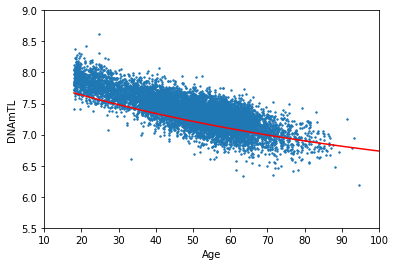

In [16]:
# plotting scatter of GS data
# vs our model

plt.plot(t, average_tel(t, params), color = 'red')
plt.scatter(x_values, y_values, s = 2)

plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

## Curve Fitting

### Using LO based on data input

In [17]:
# Using LO based on our specific df
# and fitting
# M = rate of division
# delta = fraction of attrition
# alpha = rate of death - rate of division

In [18]:
# function to find LO, as an average of y values corresponding to head x values 
def find_LO(df):
    sorted_age_DNAmTL = df.sort_values('age')
    temp = sorted_age_DNAmTL.head(300)
    LO = temp['DNAmTL'].median()
    return LO


#get LO for dataset
LO = find_LO(age_DNAmTL)
LO

7.903282611956341

In [19]:
def avg_tel_LO(t, M, delta, alpha):
    y = LO - ((2*M*delta)/alpha)*(1-math.e**(-alpha*t))
    return y

In [20]:
# optimise other parameters
pars, testcov = curve_fit(avg_tel_LO, x_values, y_values)
print(pars)

[ 0.05917522  0.06062484 -0.01415034]


9537

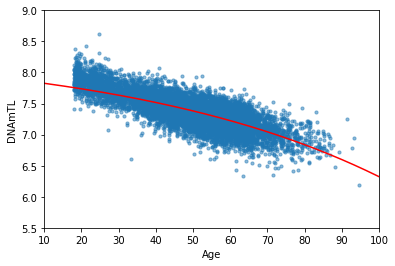

In [30]:
r = len(x_values)

t = np.linspace (0, 100, r)

plt.plot(t, avg_tel_LO(t, *pars), color = 'red')
plt.scatter(x_values, y_values, s=10, alpha = 0.5)

plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

### Using Fit LO

In [31]:
# here we also try and fit the LO value... which we get weird results with
def avg_tel_no_LO(t, LO, M, delta, alpha):
    y = LO - ((2*M*delta)/alpha)*(1-math.e**(-alpha*t))
    return y

In [32]:
pars, testcov = curve_fit(avg_tel_no_LO, x_values, y_values)
print(pars)

[16.88824426  5.9168818   1.6298328   2.0265669 ]


C:\Users\gabri\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


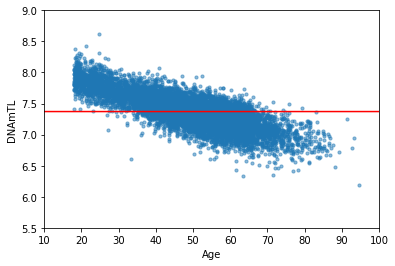

In [33]:
r = len(x_values)

t = np.linspace (0, 100, r)

plt.plot(t, avg_tel_no_LO(t, *pars), color = 'red')
plt.scatter(x_values, y_values, s=10, alpha = 0.5)

plt.ylabel('DNAmTL')
plt.yscale('linear')
plt.xlabel('Age')

plt.ylim((5.5, 9.0))
plt.xlim((10, 100))

plt.show()

In [ ]:
# mathematically, idgi rn